In [2]:
#### now add the mapillary info

In [3]:
import geopandas as gpd
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

### get mapillary_coverage

In [4]:
# ndissolved works well, however rather want to work with dissolved and cut TODOO

#mapillary_coverage = gpd.read_parquet(r"mapillary_coverage_23_bb_buffered10m_dissolved.parquet")
#mapillary_coverage = gpd.read_parquet(r"mapillary_coverage_23_berlin_buffered10m_dissolved.parquet")

mapillary_coverage = gpd.read_parquet(r"mapillary_coverage_23_germany_buffered10m_dissolved_pano_25-04-06.parquet")
#mapillary_coverage = gpd.read_parquet(r"mapillary_coverage_23_germany_buffered10m_dissolved_all_25-04-06.parquet")


In [5]:
mapillary_coverage

,tile_x,tile_y,geometry,captured_at,creator_id,id,image_id,is_pano,organization_id
0,8465.0,5502.0,"MULTIPOLYGON (((288851.063 5626351.092, 288861...",2024-03-07,1.052123e+14,OAKZUWexMFhJzN3BGcRawI,6.967082e+15,True,NaN
1,8466.0,5501.0,"POLYGON ((291437.268 5627792.702, 291438.204 5...",2024-03-07,1.052123e+14,zWmfNPpuJbOFZLIVvMh6eU,1.554838e+15,True,NaN
2,8466.0,5502.0,"POLYGON ((289858.3 5626663.451, 289858.575 562...",2024-03-07,1.052123e+14,zWmfNPpuJbOFZLIVvMh6eU,1.554838e+15,True,NaN
3,8467.0,5501.0,"POLYGON ((291457.61 5627800.928, 291472.995 56...",2024-03-07,1.052123e+14,zWmfNPpuJbOFZLIVvMh6eU,1.554838e+15,True,NaN
4,8468.0,5501.0,"POLYGON ((293034.72 5628622.161, 293039.909 56...",2024-03-07,1.052123e+14,zWmfNPpuJbOFZLIVvMh6eU,1.554838e+15,True,NaN
...,...,...,...,...,...,...,...,...,...
9698,8861.0,5407.0,"POLYGON ((890593.421 5783513.683, 890592.763 5...",2024-09-18,9.464048e+14,PkHEcaXoBZv4Vlw9fhC7sY,7.690722e+14,True,NaN
9699,8861.0,5474.0,"POLYGON ((898874.334 5680667.099, 898873.404 5...",2024-10-24,7.770986e+14,Cc1207dmo8x3PAfEsteuZy,4.728979e+14,True,NaN
9700,8861.0,5475.0,"POLYGON ((898664.707 5680572.968, 898663.624 5...",2024-10-24,7.770986e+14,9h7fmFsuQC4k81BHadLW0b,3.865771e+15,True,NaN
9701,8862.0,5406.0,"POLYGON ((892058.277 5783941.339, 892058.452 5...",2024-09-18,9.464048e+14,D43HRbgAekqlu8rc1JEpM9,8.931773e+14,True,NaN


In [6]:
## nur für pano
#mapillary_coverage=mapillary_coverage[mapillary_coverage["is_pano"]==True].copy()


mapillary_coverage = mapillary_coverage.to_crs(25832)

mapillary_clean = mapillary_coverage.explode(index_parts=False, ignore_index=True)
mapillary_clean

,tile_x,tile_y,captured_at,creator_id,id,image_id,is_pano,organization_id,geometry
0,8465.0,5502.0,2024-03-07,1.052123e+14,OAKZUWexMFhJzN3BGcRawI,6.967082e+15,True,NaN,"POLYGON ((288851.063 5626351.092, 288861.369 5..."
1,8465.0,5502.0,2024-03-07,1.052123e+14,OAKZUWexMFhJzN3BGcRawI,6.967082e+15,True,NaN,"POLYGON ((289177.717 5626349.533, 289178.033 5..."
2,8465.0,5502.0,2024-03-07,1.052123e+14,OAKZUWexMFhJzN3BGcRawI,6.967082e+15,True,NaN,"POLYGON ((289786.868 5626879.97, 289787.405 56..."
3,8466.0,5501.0,2024-03-07,1.052123e+14,zWmfNPpuJbOFZLIVvMh6eU,1.554838e+15,True,NaN,"POLYGON ((291437.268 5627792.702, 291438.204 5..."
4,8466.0,5502.0,2024-03-07,1.052123e+14,zWmfNPpuJbOFZLIVvMh6eU,1.554838e+15,True,NaN,"POLYGON ((289858.3 5626663.451, 289858.575 562..."
...,...,...,...,...,...,...,...,...,...
15517,8861.0,5475.0,2024-10-24,7.770986e+14,9h7fmFsuQC4k81BHadLW0b,3.865771e+15,True,NaN,"POLYGON ((898664.707 5680572.968, 898663.624 5..."
15518,8862.0,5406.0,2024-09-18,9.464048e+14,D43HRbgAekqlu8rc1JEpM9,8.931773e+14,True,NaN,"POLYGON ((892058.277 5783941.339, 892058.452 5..."
15519,8874.0,5474.0,2024-10-23,7.770986e+14,h2R4VO3kNoHIp8TyWJuBr1,8.624582e+14,True,NaN,"POLYGON ((919207.471 5683680.127, 919201.197 5..."
15520,8874.0,5474.0,2024-10-23,7.770986e+14,h2R4VO3kNoHIp8TyWJuBr1,8.624582e+14,True,NaN,"POLYGON ((919155.249 5683811.523, 919156.189 5..."


In [7]:
#mapillary_coverage_pano=mapillary_coverage[mapillary_coverage["is_pano"]==True].copy()
#mapillary_coverage_npano=mapillary_coverage[mapillary_coverage["is_pano"]==False].copy()


### get the roads of interest

In [8]:
# osm_roads_2024_intersect_landuse.to_parquet("../output/roads_wo_maxspeed&accs_2024_urban.parquet")
# osm_roads = gpd.read_parquet("../osm_history_analysis/output/roads_wo_maxspeed&accs_2024_urban.parquet")
# osm_roads = gpd.read_parquet("processed_osm_files/berlin_highways_250401.parquet")

osm_roads = gpd.read_parquet("processed_osm_files/processed_highways_germany_250405.parquet")

In [9]:
osm_roads=osm_roads.to_crs(25832)

In [10]:
osm_roads['length_m_before_clip'] = osm_roads.geometry.length
osm_roads

,osm_id,name,highway,waterway,aerialway,barrier,man_made,railway,z_order,other_tags,geometry,length_m_before_clip
0,92,Eigenheimstraße,residential,None,None,None,None,None,3,"""lit""=>""yes"",""maxspeed""=>""30"",""maxweight""=>""3....","LINESTRING (832194.125 5662359.794, 832231.203...",386.707524
1,93,Eigenheimberg,residential,None,None,None,None,None,3,"""lit""=>""yes"",""maxspeed""=>""30"",""maxweight""=>""3....","LINESTRING (832362.761 5662377.712, 832384.518...",89.421440
2,99,None,tertiary,None,None,None,None,None,4,"""cycleway:right""=>""no"",""junction""=>""roundabout...","LINESTRING (675921.969 5338360.059, 675924.648...",36.439158
3,100,None,secondary,None,None,None,None,None,6,"""bicycle""=>""use_sidepath"",""foot""=>""use_sidepat...","LINESTRING (673224.184 5338944.301, 673220.116...",98.561214
4,103,Altmockritz,residential,None,None,None,None,None,3,"""maxspeed""=>""5"",""postal_code""=>""01217"",""source...","LINESTRING (832498.092 5662325.944, 832513.585...",97.989768
...,...,...,...,...,...,...,...,...,...,...,...,...
15236510,1375094551,None,steps,None,None,None,None,None,0,"""handrail""=>""yes"",""incline""=>""up"",""lit""=>""yes""...","LINESTRING (314905.681 5645272.199, 314906.766...",4.318787
15236511,1375094552,None,footway,None,None,None,None,None,0,None,"LINESTRING (314904.147 5645266.677, 314905.681...",5.731426
15236512,1375094701,None,path,None,None,None,None,None,0,"""surface""=>""compacted""","LINESTRING (597708.628 5929085.52, 597688.319 ...",28.035884
15236513,1375094702,None,footway,None,None,None,None,None,0,"""surface""=>""paving_stones""","LINESTRING (597619.085 5929058.607, 597618.674...",106.884186


In [ ]:
## germany pano only: Processing roads: 100%|██████████| 15236515/15236515 [1:44:08<00:00, 2438.40it/s]  

## germany all: ~ 10h


from shapely.geometry import box
from tqdm import tqdm

def spatial_filter(gdf, geom):
    idx = gdf.sindex.query(geom, predicate="intersects")
    return gdf.iloc[idx]


#sample=osm_roads_2024_intersect_landuse[:1500].copy()
#sample=osm_roads_2024_intersect_landuse.copy()


clipped_lines = []

clipped_gdf = gpd.GeoDataFrame()

for _, row in tqdm(osm_roads.iterrows(), total=len(osm_roads), desc="Processing roads"):
    bbox = box(*row.geometry.bounds)
    #filtered_polys = mapillary_clean[mapillary_clean.intersects(bbox)]
    filtered_polys = spatial_filter(mapillary_clean, bbox) # 3times faster than intersects
    
    if not filtered_polys.empty:
        clipped = gpd.clip(gpd.GeoDataFrame([row], crs=osm_roads.crs), filtered_polys)
        clipped_lines.append(clipped)

# Combine all results
clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped_lines, ignore_index=True), crs=osm_roads.crs)


Processing roads:  40%|████      | 6105095/15236515 [35:31<30:07, 5052.92it/s]  

In [33]:
clipped_gdf['length_m_after_clip'] = clipped_gdf.geometry.length

clipped_gdf["mp_coverage_ratio"] = clipped_gdf["length_m_after_clip"] / clipped_gdf["length_m_before_clip"]



<Axes: >

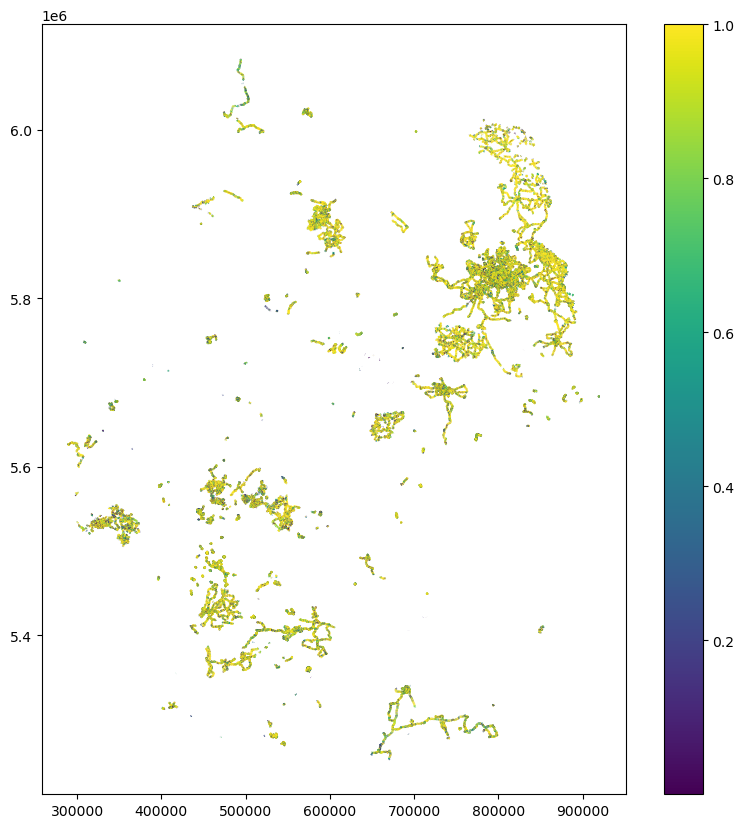

In [16]:
clipped_gdf.plot(column="mp_coverage_ratio", cmap="viridis", legend=True, figsize=(10, 10))

array([[<Axes: title={'center': 'mp_coverage_ratio'}>]], dtype=object)

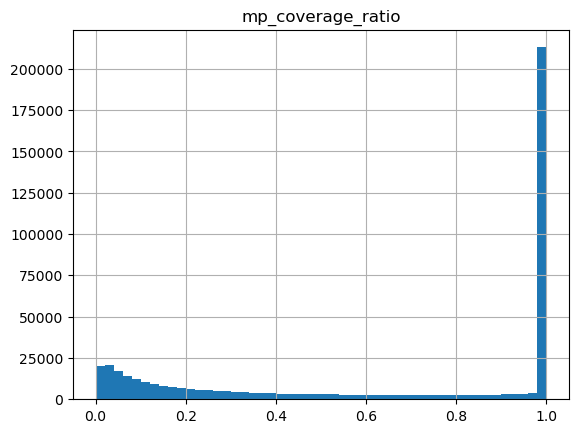

In [17]:
clipped_gdf.hist(column="mp_coverage_ratio", bins=50)

In [18]:
clipped_gdf.columns

Index(['osm_id', 'name', 'highway', 'waterway', 'aerialway', 'barrier',
       'man_made', 'railway', 'z_order', 'other_tags', 'geometry',
       'length_m_before_clip', 'length_m_after_clip', 'mp_coverage_ratio'],
      dtype='object')

In [ ]:
clipped_gdf

In [34]:
#clipped_gdf=clipped_gdf[["id","count_accidents","mp_coverage_ratio", "length_km_before_clip", "length_km_after_clip", "geometry"]].copy()
clipped_gdf=clipped_gdf[["osm_id", "highway", "mp_coverage_ratio", "length_m_before_clip", "length_m_after_clip", "geometry"]].copy()

In [ ]:
#clipped_gdf.to_file("berlin_highways_250401_mp_coverage_ratio.gpkg")
#clipped_gdf.to_file("germany_osm-highways_25-04-05_mp_coverage_25-04-03_ratio.gpkg")


clipped_gdf.to_parquet("germany_osm-highways_25-04-05_mp_pano_coverage_25-04-03_ratio.parquet")
#clipped_gdf.to_parquet("germany_osm-highways_25-04-05_mp_all_coverage_25-04-03_ratio.parquet")